<a href="https://colab.research.google.com/github/AarohSinha100/DEEP_LEARNING/blob/main/STOCK_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
import datetime as dt
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use("fivethirtyeight")

In [7]:
df = pd.read_csv('ASIANPAINT.csv')
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,ASIANPAINT,EQ,361.20,370.0,390.00,370.00,385.0,381.65,380.54,3318,1.262617e+11,NaN,NaN,NaN
1,2000-01-04,ASIANPAINT,EQ,381.65,380.0,392.00,375.00,390.0,385.55,383.50,4818,1.847699e+11,NaN,NaN,NaN
2,2000-01-05,ASIANPAINT,EQ,385.55,371.5,390.00,371.50,383.0,383.00,379.81,2628,9.981384e+10,NaN,NaN,NaN
3,2000-01-06,ASIANPAINT,EQ,383.00,384.9,384.90,374.50,375.1,377.50,379.88,3354,1.274114e+11,NaN,NaN,NaN
4,2000-01-07,ASIANPAINT,EQ,377.50,376.0,390.00,370.00,389.0,385.70,383.38,9589,3.676275e+11,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,ASIANPAINT,EQ,2517.95,2530.0,2575.00,2530.00,2558.0,2557.90,2557.47,1103980,2.823400e+14,58557.0,335232.0,0.3037
5302,2021-04-27,ASIANPAINT,EQ,2557.90,2545.0,2579.90,2534.00,2571.0,2574.35,2560.55,866331,2.218288e+14,66988.0,281178.0,0.3246
5303,2021-04-28,ASIANPAINT,EQ,2574.35,2588.0,2620.25,2575.00,2612.0,2614.55,2605.91,1065561,2.776752e+14,52622.0,449241.0,0.4216
5304,2021-04-29,ASIANPAINT,EQ,2614.55,2630.0,2642.00,2570.00,2613.0,2613.45,2607.33,1295346,3.377394e+14,64039.0,447979.0,0.3458


In [25]:
df.drop(["Symbol","Series","Last","VWAP","Turnover","Deliverable Volume","%Deliverble"],axis=1,inplace=True)

In [29]:
df.drop("Trades",axis=1,inplace=True)

In [34]:
df = df.set_index("Date")
df.head()

,Prev Close,Open,High,Low,Close,Volume
Date,,,,,,
2000-01-03,361.20,370.0,390.0,370.0,381.65,3318
2000-01-04,381.65,380.0,392.0,375.0,385.55,4818
2000-01-05,385.55,371.5,390.0,371.5,383.00,2628
2000-01-06,383.00,384.9,384.9,374.5,377.50,3354
2000-01-07,377.50,376.0,390.0,370.0,385.70,9589


In [41]:
#Get the number of rows and columns in the dataset

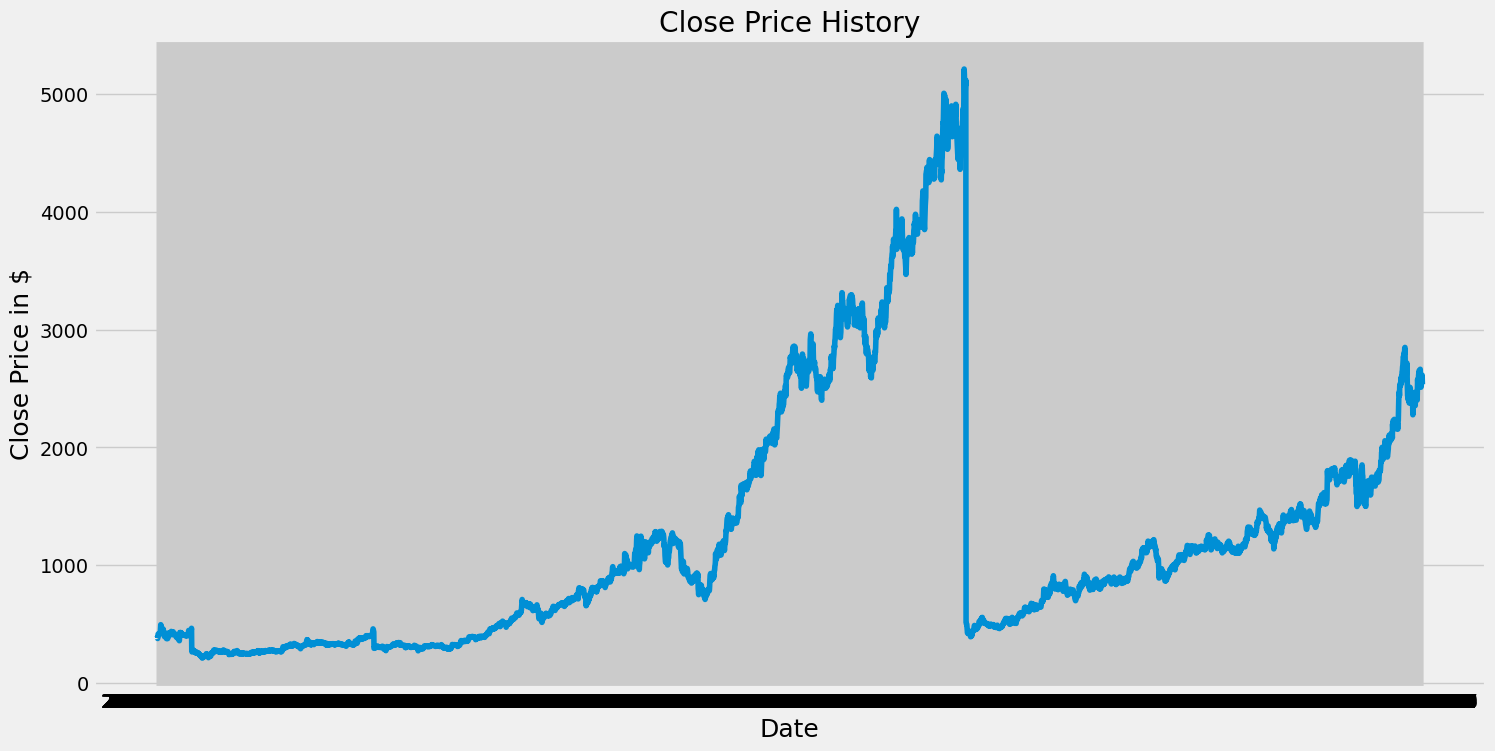

In [58]:
#Visualise the closing price
plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot(df["Close"])
plt.xlabel("Date",fontsize=18)
plt.ylabel("Close Price in $",fontsize=18)
plt.show()

In [47]:
# Create a new dataframe with only the close column (For scaling)
data = df.filter(['Close'])
#Convert the data frame to a numpy array
dataset = data.values
#compute the number of rows to rtain the model on
training_data_len = math.ceil(len(dataset) * .8)

print(training_data_len)

4245


In [50]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data #Values between 0 and 1

array([[0.03416394],
       [0.03494358],
       [0.03443382],
       ...,
       [0.48053415],
       [0.48031425],
       [0.46491149]])

In [52]:
#Creating the scaled training dataset
train_data = scaled_data[0:training_data_len,:]
#Split the data into X_train and y_train
X_train = []
y_train = []

#For past 60 days value
for i in range(60,len(train_data)):
  X_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

  if i<=61:
    print(X_train)
    print(y_train)
    print()


[array([0.03416394, 0.03494358, 0.03443382, 0.03333433, 0.03497356,
       0.04083081, 0.04087079, 0.04136056, 0.04157046, 0.03983128,
       0.04010115, 0.0406409 , 0.0417004 , 0.04194029, 0.04299979,
       0.04950673, 0.05676332, 0.05241536, 0.05395464, 0.04992653,
       0.04988655, 0.04984657, 0.04904695, 0.04916689, 0.04855718,
       0.0497966 , 0.04925685, 0.04600838, 0.04649815, 0.04417924,
       0.04116065, 0.0376523 , 0.03635291, 0.03832199, 0.03838196,
       0.03792218, 0.03920158, 0.03793217, 0.03642288, 0.03792218,
       0.03311444, 0.03777225, 0.03583316, 0.03879177, 0.0374424 ,
       0.03314442, 0.03782222, 0.04253001, 0.03827201, 0.03782222,
       0.0378622 , 0.03932152, 0.03983128, 0.04144052, 0.0423301 ,
       0.0410607 , 0.04090078, 0.04095075, 0.04123062, 0.04083081])]
[0.04537867202414865]

[array([0.03416394, 0.03494358, 0.03443382, 0.03333433, 0.03497356,
       0.04083081, 0.04087079, 0.04136056, 0.04157046, 0.03983128,
       0.04010115, 0.0406409 , 0.04

In [53]:
#Convert the x-train and y-train to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

In [54]:
X_train.shape

(4185, 60)

In [56]:
#Reshape the data - LSTM model expects three dimensions
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape #Now we have a 3d shape

(4185, 60, 1)

In [61]:
#Build the LSTM model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (60,1))) #layer
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [62]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [63]:
#Train the model
model.fit(X_train,y_train, batch_size=1, epochs=1)

4185/4185 [==============================] - 167s 39ms/step - loss: 0.0019


In [66]:
# Create  atesting dataset containing scaled values from index 4185 to 5306
test_data = scaled_data[training_data_len-60:,:]
#Create datasets
X_test = []
y_test = dataset[training_data_len:,:]

for i in range(60,len(test_data)):
  X_test.append(test_data[i-60:i, 0])


In [67]:
#Convert data into numpy array
X_test = np.array(X_test)

In [68]:
#Reshape the data - for 3d (LSTM model expects this)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1], 1))


In [69]:
#Get the model predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions) #Unscaling the values


34/34 [==============================] - 2s 20ms/step


In [71]:
#Evaluate the model - root mean squared error (RMSE)
rmse = np.sqrt( np.mean(predictions -y_test)**2 )
rmse

99.69206947952256

<ipython-input-74-e4703f2c8f02>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


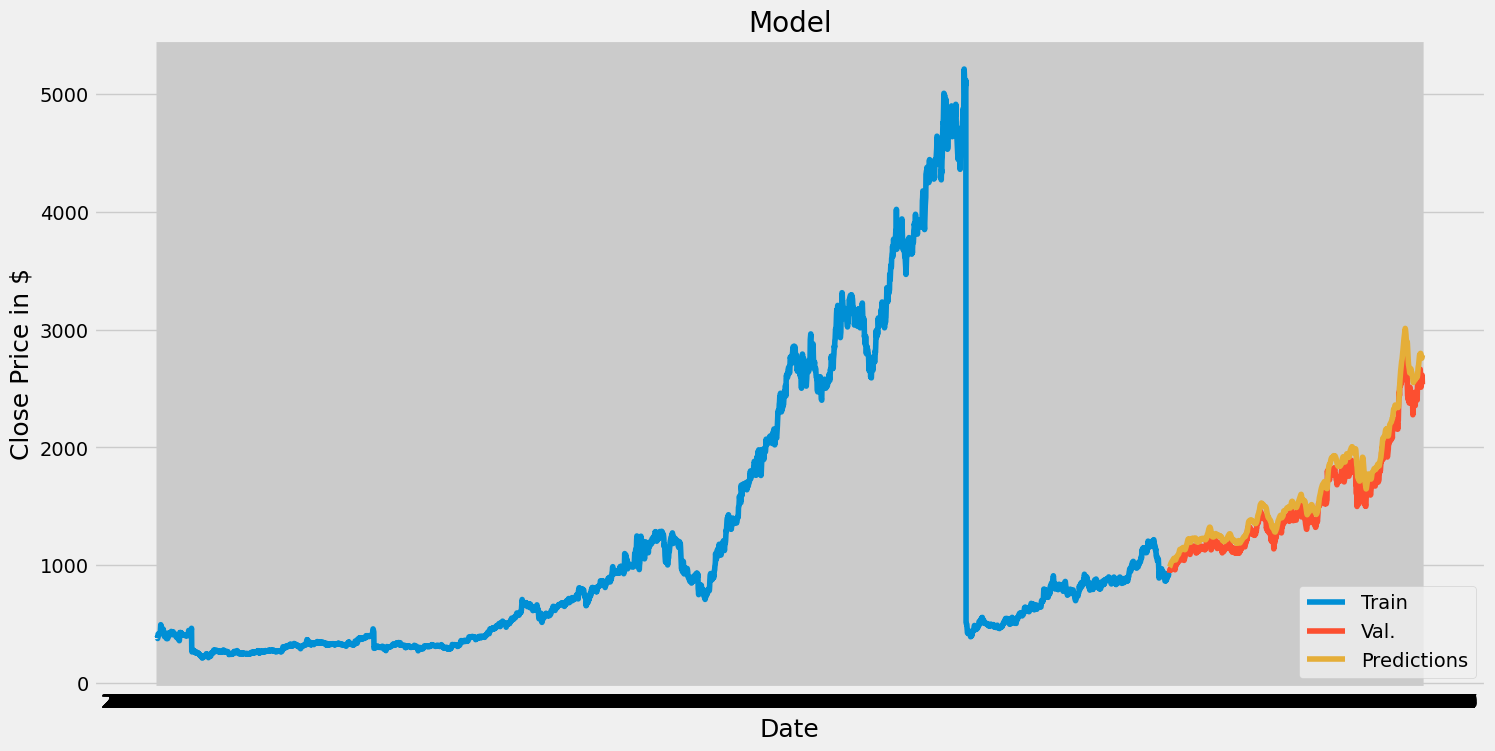

In [74]:
# PLOT THE DATA!!!!!
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price in $',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val.','Predictions'],loc='lower right')
plt.show()